In [45]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns 
import os 



In [20]:
os.chdir("/Users/ibrahima/Documents/MyGitRepository/data_analysis/datasets")

data = pd.read_csv('customers.csv').drop(columns=['CustomerID'], axis=1)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### preprocessing 

In [23]:
data["Gender"]

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

In [28]:
# Encodage avec la methode LabeEncoder 

encoder = LabelEncoder()
encoder.fit(data["Gender"])
Gender_encode = encoder.transform(data["Gender"])
Gender_encode


array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1])

In [41]:
# encodage sous un format one hot

# Gender = pd.DataFrame(data["Gender"])

# encoder = OneHotEncoder()
# encoder.fit(Gender)
# Gender_encode = encoder.transform(Gender)
# Gender_encode.toarray()


In [43]:
data = pd.get_dummies(data)
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


#### Utisation de kmeans 

In [79]:
model = KMeans(n_clusters=3)
model.fit(data)
clusters = model.predict(data)


In [84]:



def create_clusters(data:pd.DataFrame, clusters:np.ndarray)-> dict:
    
    n_clusters = len(np.unique(clusters))
    dico = {}
    
    for i in range(n_clusters):
        index = np.where(clusters==i)[0]
        data_i = data.iloc[index, :]
        dico[i] = data_i
    return dico


dico = create_clusters(data, clusters)


In [82]:
def summarise(dico): 
    for clusters, data in dico.items(): 
        print("-"*50)
        print("classe :", clusters)
        print(data.describe())
        
        print("-"*50)

In [85]:
summarise(dico)

--------------------------------------------------
classe : 0
              Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
count  123.000000          123.000000              123.000000     123.000000   
mean    40.325203           44.154472               49.829268       0.593496   
std     16.113580           16.037882               19.694265       0.493190   
min     18.000000           15.000000                3.000000       0.000000   
25%     24.500000           30.000000               42.000000       0.000000   
50%     38.000000           46.000000               50.000000       1.000000   
75%     51.500000           59.500000               58.500000       1.000000   
max     70.000000           69.000000               99.000000       1.000000   

       Gender_Male  
count   123.000000  
mean      0.406504  
std       0.493190  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  
----------------------------

In [88]:
L = []

for k in range(1, 20):
    model = KMeans(n_clusters=k)
    model.fit(data)
    inertie = model.inertia_
    L.append(inertie)


Text(0, 0.5, 'inertie')

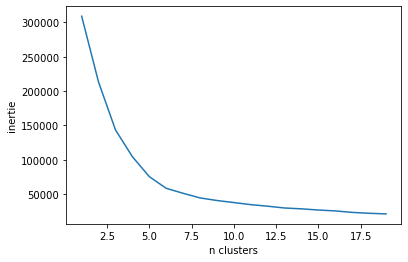

In [90]:
plt.plot(range(1,20), L )
plt.xlabel("n clusters")
plt.ylabel("inertie")